<a href="https://colab.research.google.com/github/Xavialva/Introducci-n-a-Machine-Learning/blob/main/Ejercicioknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/PTDataScience/Machine learning/abalone.data',header= None)

In [ ]:
df

0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]

In [ ]:
#Nombro a cada columna basandome en abalone.name
df.columns=['Sex','Length (mm)','Diameter (mm)','Height (mm)','Whole weight (gr)','Shucked weight (gr)','Viscera weight (gr)','Shell weight (gr)','Rings (age)']

In [ ]:
df

Sex  Length (mm)  Diameter (mm)  Height (mm)  Whole weight (gr)  \
0      M        0.455          0.365        0.095             0.5140   
1      M        0.350          0.265        0.090             0.2255   
2      F        0.530          0.420        0.135             0.6770   
3      M        0.440          0.365        0.125             0.5160   
4      I        0.330          0.255        0.080             0.2050   
...   ..          ...            ...          ...                ...   
4172   F        0.565          0.450        0.165             0.8870   
4173   M        0.590          0.440        0.135             0.9660   
4174   M        0.600          0.475        0.205             1.1760   
4175   F        0.625          0.485        0.150             1.0945   
4176   M        0.710          0.555        0.195             1.9485   

      Shucked weight (gr)  Viscera weight (gr)  Shell weight (gr)  Rings (age)  
0                  0.2245               0.1010             0.1500           15  
1                  0.0995               0.0485             0.0700            7  
2                  0.2565               0.1415             0.2100            9  
3                  0.2155               0.1140             0.1550           10  
4                  0.0895               0.0395             0.0550            7  
...                   ...                  ...                ...          ...  
4172               0.3700               0.2390             0.2490           11  
4173               0.4390               0.2145             0.2605           10  
4174               0.5255               0.2875             0.3080            9  
4175               0.5310               0.2610             0.2960           10  
4176               0.9455               0.3765             0.4950           12  

[4177 rows x 9 columns]

In [ ]:
#Compruebo de que no exista valores faltantes y que tipo de valores tengo en mi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   object 
 1   Length (mm)          4177 non-null   float64
 2   Diameter (mm)        4177 non-null   float64
 3   Height (mm)          4177 non-null   float64
 4   Whole weight (gr)    4177 non-null   float64
 5   Shucked weight (gr)  4177 non-null   float64
 6   Viscera weight (gr)  4177 non-null   float64
 7   Shell weight (gr)    4177 non-null   float64
 8   Rings (age)          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
#Otra vista de los tipos de valores; sus máximos, ,ínimos y promedio de los mismos.
df.describe()

Length (mm)  Diameter (mm)  Height (mm)  Whole weight (gr)  \
count  4177.000000    4177.000000  4177.000000        4177.000000   
mean      0.523992       0.407881     0.139516           0.828742   
std       0.120093       0.099240     0.041827           0.490389   
min       0.075000       0.055000     0.000000           0.002000   
25%       0.450000       0.350000     0.115000           0.441500   
50%       0.545000       0.425000     0.140000           0.799500   
75%       0.615000       0.480000     0.165000           1.153000   
max       0.815000       0.650000     1.130000           2.825500   

       Shucked weight (gr)  Viscera weight (gr)  Shell weight (gr)  \
count          4177.000000          4177.000000        4177.000000   
mean              0.359367             0.180594           0.238831   
std               0.221963             0.109614           0.139203   
min               0.001000             0.000500           0.001500   
25%               0.186000             0.093500           0.130000   
50%               0.336000             0.171000           0.234000   
75%               0.502000             0.253000           0.329000   
max               1.488000             0.760000           1.005000   

       Rings (age)  
count  4177.000000  
mean      9.933684  
std       3.224169  
min       1.000000  
25%       8.000000  
50%       9.000000  
75%      11.000000  
max      29.000000

In [ ]:
df.corr().sort_values(by=['Rings (age)'])

Length (mm)  Diameter (mm)  Height (mm)  \
Shucked weight (gr)     0.897914       0.893162     0.774972   
Viscera weight (gr)     0.903018       0.899724     0.798319   
Whole weight (gr)       0.925261       0.925452     0.819221   
Length (mm)             1.000000       0.986812     0.827554   
Height (mm)             0.827554       0.833684     1.000000   
Diameter (mm)           0.986812       1.000000     0.833684   
Shell weight (gr)       0.897706       0.905330     0.817338   
Rings (age)             0.556720       0.574660     0.557467   

                     Whole weight (gr)  Shucked weight (gr)  \
Shucked weight (gr)           0.969405             1.000000   
Viscera weight (gr)           0.966375             0.931961   
Whole weight (gr)             1.000000             0.969405   
Length (mm)                   0.925261             0.897914   
Height (mm)                   0.819221             0.774972   
Diameter (mm)                 0.925452             0.893162   
Shell weight (gr)             0.955355             0.882617   
Rings (age)                   0.540390             0.420884   

                     Viscera weight (gr)  Shell weight (gr)  Rings (age)  
Shucked weight (gr)             0.931961           0.882617     0.420884  
Viscera weight (gr)             1.000000           0.907656     0.503819  
Whole weight (gr)               0.966375           0.955355     0.540390  
Length (mm)                     0.903018           0.897706     0.556720  
Height (mm)                     0.798319           0.817338     0.557467  
Diameter (mm)                   0.899724           0.905330     0.574660  
Shell weight (gr)               0.907656           1.000000     0.627574  
Rings (age)                     0.503819           0.627574     1.000000

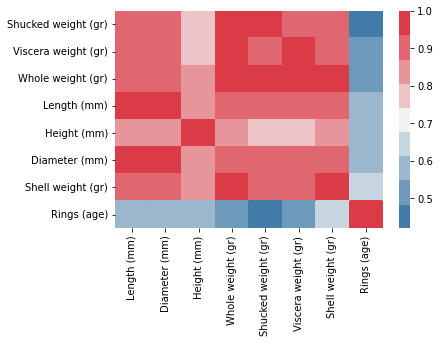

In [ ]:
#Ver de una manera más sencilla los datos
sns.heatmap(df.corr().sort_values(by = ['Rings (age)']), cmap = sns.diverging_palette(240, 10, n=9))

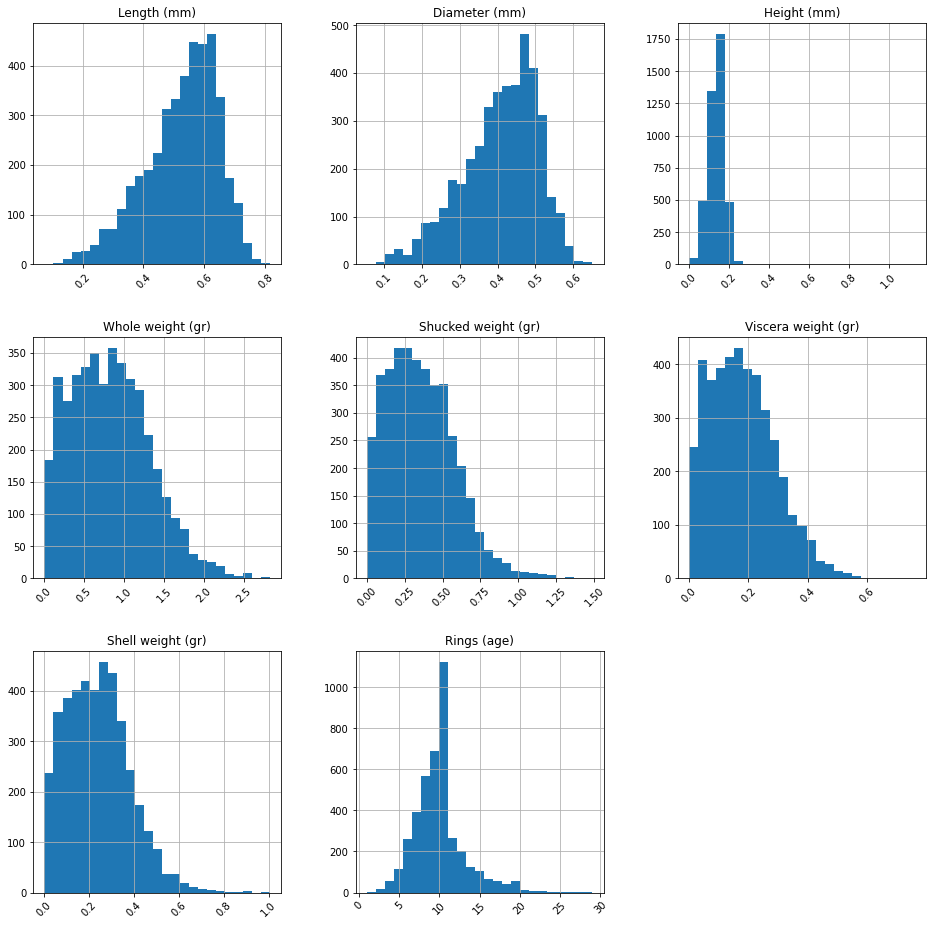

In [ ]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=45);

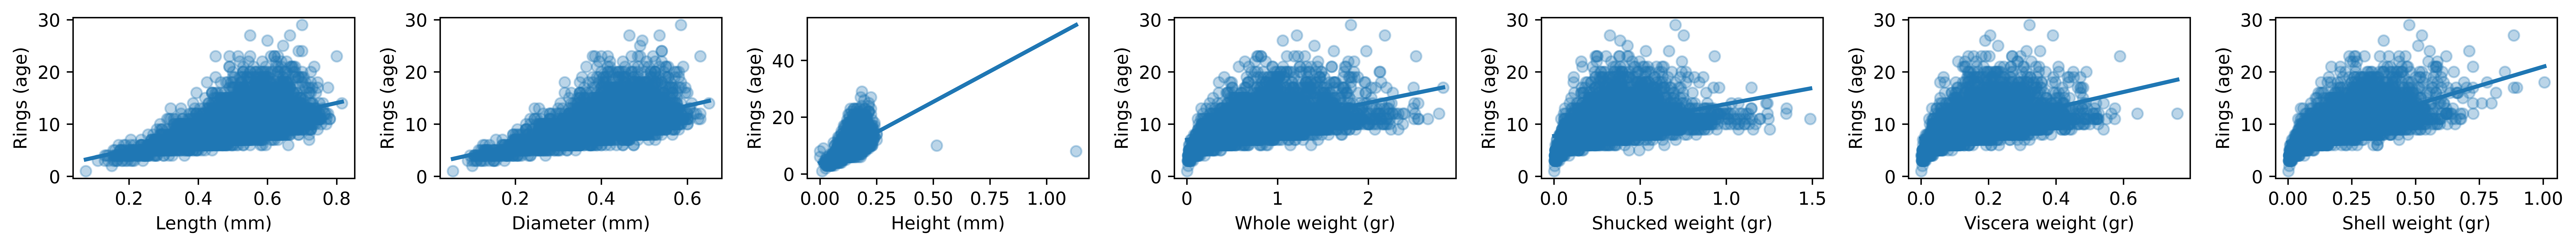

In [ ]:
#Una vista de la regresión de las características en función de 'Rings (age)'
fig, axes = plt.subplots(nrows = 1,ncols = 7,figsize = (20,2), dpi=1000)
sns.regplot(x='Length (mm)', y='Rings (age)', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter (mm)', y='Rings (age)', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Height (mm)', y='Rings (age)', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});

sns.regplot(x='Whole weight (gr)', y='Rings (age)', data=df, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
sns.regplot(x='Shucked weight (gr)', y='Rings (age)', data=df, ci=None, ax = axes[4], scatter_kws={'alpha':0.3});
sns.regplot(x='Viscera weight (gr)', y='Rings (age)', data=df, ci=None, ax = axes[5], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight (gr)', y='Rings (age)', data=df, ci=None, ax = axes[6], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [ ]:
#Creo mi matriz de características
variables= ['Length (mm)',
            'Diameter (mm)',
            'Height (mm)',
            'Whole weight (gr)',
            'Shucked weight (gr)',
            'Viscera weight (gr)']

In [ ]:
variables

['Length (mm)',
 'Diameter (mm)',
 'Height (mm)',
 'Whole weight (gr)',
 'Shucked weight (gr)',
 'Viscera weight (gr)']

In [ ]:
#compruebo mi matriz de características
df.loc[:,variables]

Length (mm)  Diameter (mm)  Height (mm)  Whole weight (gr)  \
0           0.455          0.365        0.095             0.5140   
1           0.350          0.265        0.090             0.2255   
2           0.530          0.420        0.135             0.6770   
3           0.440          0.365        0.125             0.5160   
4           0.330          0.255        0.080             0.2050   
...           ...            ...          ...                ...   
4172        0.565          0.450        0.165             0.8870   
4173        0.590          0.440        0.135             0.9660   
4174        0.600          0.475        0.205             1.1760   
4175        0.625          0.485        0.150             1.0945   
4176        0.710          0.555        0.195             1.9485   

      Shucked weight (gr)  Viscera weight (gr)  
0                  0.2245               0.1010  
1                  0.0995               0.0485  
2                  0.2565               0.1415  
3                  0.2155               0.1140  
4                  0.0895               0.0395  
...                   ...                  ...  
4172               0.3700               0.2390  
4173               0.4390               0.2145  
4174               0.5255               0.2875  
4175               0.5310               0.2610  
4176               0.9455               0.3765  

[4177 rows x 6 columns]

In [ ]:
#Nombro a mi matriz de características y la transformo en "array"
X=df.loc[:,variables].values

In [ ]:
#Compruebo la bidimensionalidad de mi variable
X.shape

(4177, 6)

In [ ]:
#Vector destino que en este "primer caso", es Ring (age)
y= df.loc[:,'Rings (age)'].values

In [ ]:
#Compruebo la dimensionalidad de mi 'vector destino'
y.shape

(4177,)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
#Creo mi base de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=40,)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=40)

In [ ]:
knn.predict(X_train[0:10])


array([10.925, 10.425, 10.55 ,  4.15 ,  8.125,  8.45 , 10.75 ,  9.775,
       14.25 , 10.475])

In [ ]:
y_test[0:10]

array([ 8, 10,  8, 12,  6,  9, 13, 10, 10, 14])

In [ ]:
knn.score(X_test,y_test)

0.47254154015744576

In [ ]:
#Por el método regresión lineal normal
reg = LinearRegression(fit_intercept=True)

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.predict(X[0:10])

array([ 8.88208771,  7.21988572, 11.00464345,  9.3093439 ,  7.07109344,
        8.05963777, 13.02593087, 11.20822491,  9.23399101, 12.96752286])

In [ ]:
y[0:10]

In [ ]:
score = reg.score(X_test, y_test)
print(score)

0.4789803553426595


In [ ]:
reg.coef_

array([-0.16689198,  1.42896947,  0.44950899,  7.03827717, -5.57091294,
       -1.4387809 ])

In [ ]:
reg.intercept_

9.969830273847817

# ¿Podrías haber utilizado la regresión lineal y la regresión KNN para resolver el problema de regresión?

Pues no, se observa que el modelo más preciso es 'La regresión KNN puesto que tiene un score mucho mejor que con una simple regresión lineal.
Además que pese a que se ajusto los 'n_neighbors' más altos sigue teniendo un mejor precisión que el método lineal.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   int64  
 1   Length (mm)          4177 non-null   float64
 2   Diameter (mm)        4177 non-null   float64
 3   Height (mm)          4177 non-null   float64
 4   Whole weight (gr)    4177 non-null   float64
 5   Shucked weight (gr)  4177 non-null   float64
 6   Viscera weight (gr)  4177 non-null   float64
 7   Shell weight (gr)    4177 non-null   float64
 8   Rings (age)          4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [ ]:
df.corr().sort_values(by=['Sex'])

Sex  Length (mm)  Diameter (mm)  Height (mm)  \
Whole weight (gr)   -0.461238     0.925261       0.925452     0.819221   
Diameter (mm)       -0.458245     0.986812       1.000000     0.833684   
Viscera weight (gr) -0.454658     0.903018       0.899724     0.798319   
Length (mm)         -0.448765     1.000000       0.986812     0.827554   
Shell weight (gr)   -0.445549     0.897706       0.905330     0.817338   
Shucked weight (gr) -0.440927     0.897914       0.893162     0.774972   
Height (mm)         -0.417928     0.827554       0.833684     1.000000   
Rings (age)         -0.351822     0.556720       0.574660     0.557467   
Sex                  1.000000    -0.448765      -0.458245    -0.417928   

                     Whole weight (gr)  Shucked weight (gr)  \
Whole weight (gr)             1.000000             0.969405   
Diameter (mm)                 0.925452             0.893162   
Viscera weight (gr)           0.966375             0.931961   
Length (mm)                   0.925261             0.897914   
Shell weight (gr)             0.955355             0.882617   
Shucked weight (gr)           0.969405             1.000000   
Height (mm)                   0.819221             0.774972   
Rings (age)                   0.540390             0.420884   
Sex                          -0.461238            -0.440927   

                     Viscera weight (gr)  Shell weight (gr)  Rings (age)  
Whole weight (gr)               0.966375           0.955355     0.540390  
Diameter (mm)                   0.899724           0.905330     0.574660  
Viscera weight (gr)             1.000000           0.907656     0.503819  
Length (mm)                     0.903018           0.897706     0.556720  
Shell weight (gr)               0.907656           1.000000     0.627574  
Shucked weight (gr)             0.931961           0.882617     0.420884  
Height (mm)                     0.798319           0.817338     0.557467  
Rings (age)                     0.503819           0.627574     1.000000  
Sex                            -0.454658          -0.445549    -0.351822

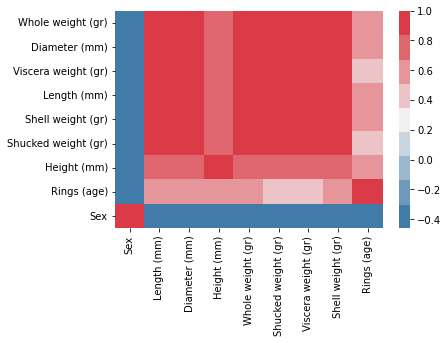

In [ ]:
#Ver de una manera más sencilla los datos
sns.heatmap(df.corr().sort_values(by = ['Sex']), cmap = sns.diverging_palette(240, 10, n=9))

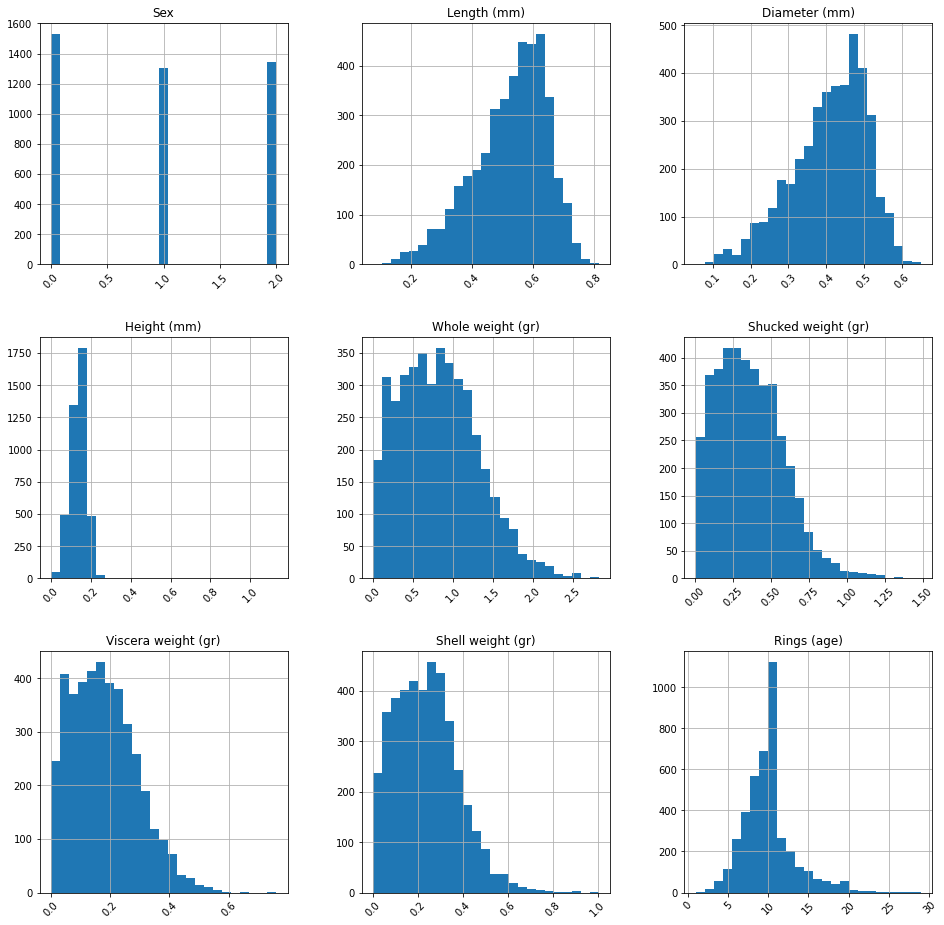

In [ ]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=45);

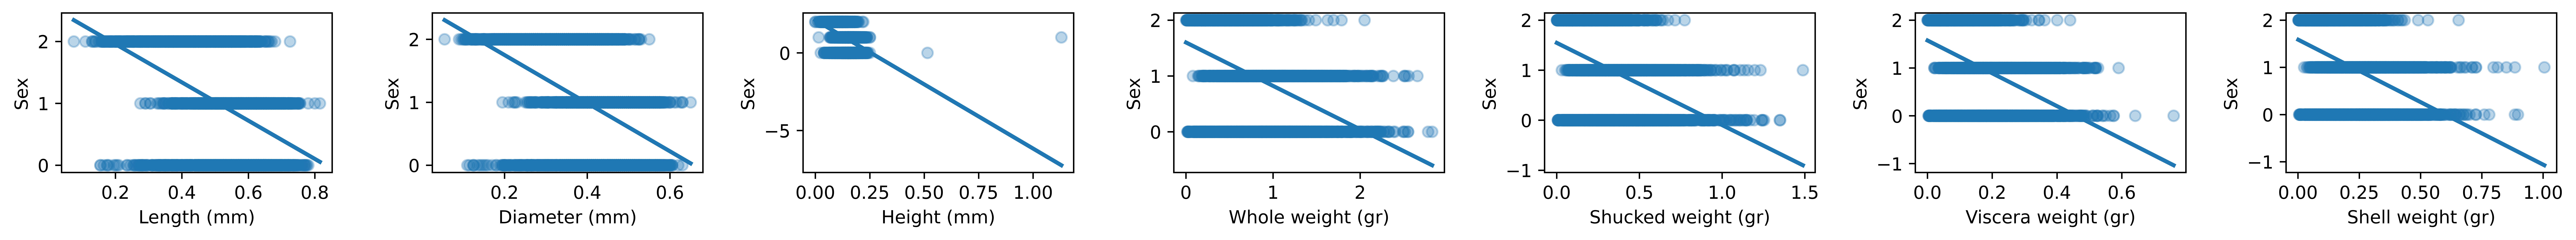

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 7,figsize = (20,2), dpi=1000)
sns.regplot(x='Length (mm)', y='Sex', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter (mm)', y='Sex', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Height (mm)', y='Sex', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});

sns.regplot(x='Whole weight (gr)', y='Sex', data=df, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
sns.regplot(x='Shucked weight (gr)', y='Sex', data=df, ci=None, ax = axes[4], scatter_kws={'alpha':0.3});
sns.regplot(x='Viscera weight (gr)', y='Sex', data=df, ci=None, ax = axes[5], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight (gr)', y='Sex', data=df, ci=None, ax = axes[6], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [ ]:
#Convierto los valores 'objeto' de la variable 'Sex' a valores numéricos('M'= 0, 'F'=1, 'I'=2) 
df['Sex'].value_counts()

0    1528
I    1342
1    1307
Name: Sex, dtype: int64

In [ ]:
#Compruebo que haya existido
df['Sex'].replace({'M':0},inplace= True)
df['Sex'].value_counts()

0    1528
I    1342
1    1307
Name: Sex, dtype: int64

In [ ]:
df['Sex'].replace({'F':1}, inplace= True)
df['Sex'].value_counts()


0    1528
I    1342
1    1307
Name: Sex, dtype: int64

In [ ]:
df['Sex'].replace({'I':2},inplace= True)
df['Sex'].value_counts()
df['Sex'].sort_values()

0       0
2157    0
2156    0
2155    0
2154    0
       ..
1859    2
1860    2
1862    2
1851    2
2640    2
Name: Sex, Length: 4177, dtype: int64

In [ ]:
#Comprobación extra
df['Sex'].describe

<bound method NDFrame.describe of 0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64>

In [ ]:
#Mi nuevo vector destino es 'Sex'
y2= df.loc[:,'Sex'].values

In [ ]:
#Mi matriz de características es igual que el anterior modelo,compruebo su bidimensionalidad
X.shape

(4177, 6)

In [ ]:
#Compruebo la dimensionalidad de mi vector destino 'y2'
y2.shape

(4177,)

In [ ]:
# Hago el corte para mi modelo
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=.25, random_state=3)


In [ ]:
#Elijo el modelo de clasificación en este caso.
knn2 = KNeighborsClassifier(n_neighbors=10)


In [ ]:
#Entreno mi modelo
knn2.fit(X_train, y2_train) 

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Predicción de mis datos
predictions2= knn2.predict(X_train)

In [ ]:
predictions2

array([0, 0, 0, ..., 0, 2, 1])

In [ ]:
#Precisión de mi modelo
knn2.score(X_test,y2_test)

0.5377990430622009

# ¿Podrías haber utilizado la regresión lineal para el problema de clasificación?

No porque el uno me ayuda a predecir valores mediante la data, en cambio en un modelo de clasificación puedo ver  a que 'tipo de datos' de mi vector destino se acerca mi modelo.
